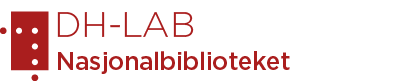

## Oppstart

In [1]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
from dhlab.nbtext import frame_sort
import networkx as nx
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Konstruer et korpus med Dewey


In [3]:
korpus = nb.book_urn(ddk='641.2%', period=(1960, 2020), limit=200)


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.

In [4]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2012052308095,"Steingrimsen, Oskar",Din egen dram,1982
1,2010050403066,"Dege, Hroar",Historien om de norske akevitter,1997
2,2016030248188,,Fisk og vin,2001
3,2011012703006,"Hagerup, Klaus",Lykke i Piemonte,2009
4,2014012809009,,Hvitvinsguiden,2002
5,2016030308055,"Bernstein, Leonard S.",Vinsnobbens offisielle håndbok,1987
6,2015050748052,,Rødvinsguiden,2012
7,2016070548078,"Clarke, Oz",Druer og viner fra hele verden,2002
8,2011022803038,"Salvesen, Geir",Himmelske kombinasjoner,2007
9,2011022403015,"Bølgen, Toralf",Ost og vin,2010


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

In [5]:
collword = 'rødvin'

In [6]:
# konkordans-sjekk

nb.urn_concordance(word = 'østers', urns = korpus, size = 5)

"Historien om de norske akevitter, Dege, Hroar, 1997",om at hennes yndlingsspise var,østers,. Den gang som nå
"Historien om de norske akevitter, Dege, Hroar, 1997",Dekket med Flora Danica og,østers,fra de store østersbankene på
"Historien om de norske akevitter, Dege, Hroar, 1997",2. hadde stor lidenskap for,østers,. For å tilfredsstille denne
"Historien om de norske akevitter, Dege, Hroar, 1997",store problemer med å holde,østers,holdbar i noen dager .
"Historien om de norske akevitter, Dege, Hroar, 1997",a . forurenset eller bedervet,østers,.
"Vinsnobbens offisielle håndbok, Bernstein, Leonard S., 1987",hva som harmonerer best med,østers,Rockefeller . Det er -
"Vinsnobbens offisielle håndbok, Bernstein, Leonard S., 1987",Hvis retten var en,østers,"Rockefeller , ville vinsnobben også"
"Vinsnobbens offisielle håndbok, Bernstein, Leonard S., 1987",- er ikke vinen til,østers,Rockefeller . Balansegangen mellom det
"Vinsnobbens offisielle håndbok, Bernstein, Leonard S., 1987",vil foreslå en Beaujolais til,østers,"Rockefeller , skal du gjøre"
"Himmelske kombinasjoner, Salvesen, Geir, 2007",nødvendigvis er den beste til,østers,. Seiv om begge hører
"Himmelske kombinasjoner, Salvesen, Geir, 2007",. I Australia er seiv,østers,"en litt sødmefull affære ,"


Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [7]:
coll = nb.urn_coll(collword, urns = korpus, after = 5, before = 5, limit = 1000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [8]:
coll.head(10)

,0
",",3445
.,3113
og,2004
en,1947
er,1229
av,1076
som,1005
med,985
i,982
til,787



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Bokhylla aggregert

In [9]:
tot = nb.frame(nb.totals(top = 50000))

In [10]:
tot.head()

,0
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583


#### Aggregert korpus

In [11]:
korpus_agg = nb.aggregate_urns(korpus)

Gjør den om til dataramme, sorterer og ser på resultatet 
1. Dataramme med kommando `frame()`
2. Sortering med `frame_sort()` definert øverst i den her notebooken.

In [12]:
korpus_agg = frame_sort(nb.frame(korpus_agg))

In [13]:
korpus_agg.head(10)

,0
",",726324
.,607377
og,370316
i,284037
er,222791
av,189591
som,184028
en,155422
med,126502
til,124112


#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

In [14]:
nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(coll)

True

Inspiser dataene etter normalisering

### Aggregert korpus

Fyll inn verdier for `.head()` for å se mer.

In [15]:
korpus_agg.head()

,0
",",0.054256
.,0.045370
og,0.027662
i,0.021217
er,0.016642


### Bokhylla total

In [16]:
tot.head()

,0
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


### Kollokasjonen

In [17]:
coll.head()

,0
",",0.059955
.,0.054177
og,0.034876
en,0.033884
er,0.021389


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [18]:
coll_assoc = frame_sort(coll**1.0/tot)

In [19]:
coll_assoc.head(20)

,0
hvitvin,3960.007603
Bordeaux,749.996046
Kraftig,648.341667
rødvin,625.999418
fyldig,547.608600
drikkes,439.053763
Chateau,406.225363
druer,352.523613
saftig,325.682828
portvin,323.403356


### Sammenlign med korpus

Her kan det være nyttig å bruke en eksponent for å dempe effekten av lavfrekvente ord.

In [20]:
coll_assoc_korp = frame_sort(coll**1.2/korpus_agg)

In [21]:
coll_assoc_korp.head(20)

,0
Karbonader,111.737456
bodeaux,59.797533
vintype:,59.797533
T3IH1in,59.797533
Suffleer,59.797533
tilberedningsform,44.890174
Fettstrukturen,44.813996
fiskefettet,44.694982
Fordeling,38.648895
jordbærsmakende,37.245819


# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

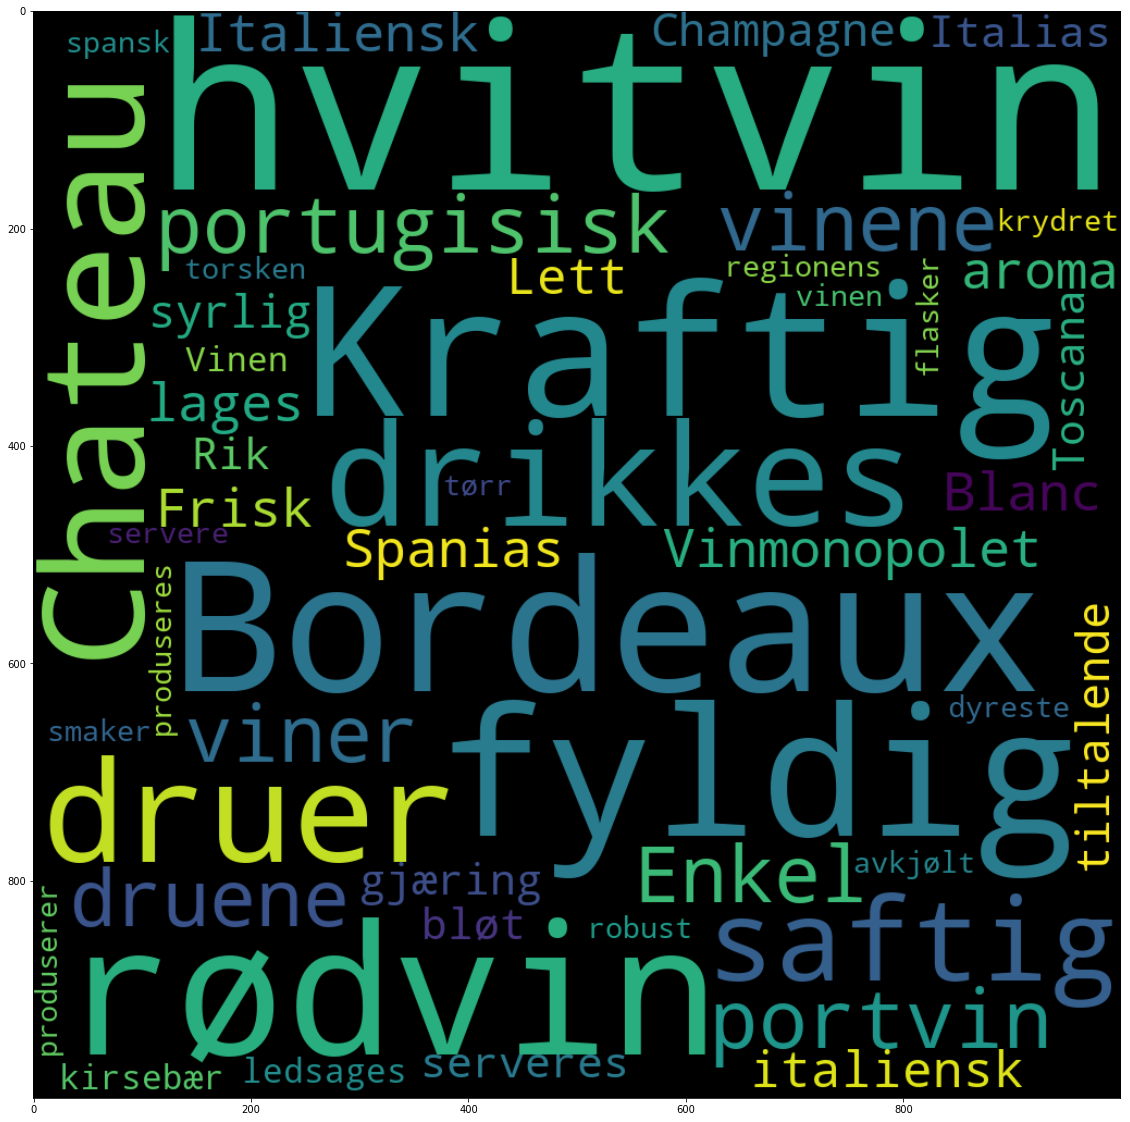

In [22]:
nb.cloud(coll_assoc.head(50)/coll_assoc.sum())

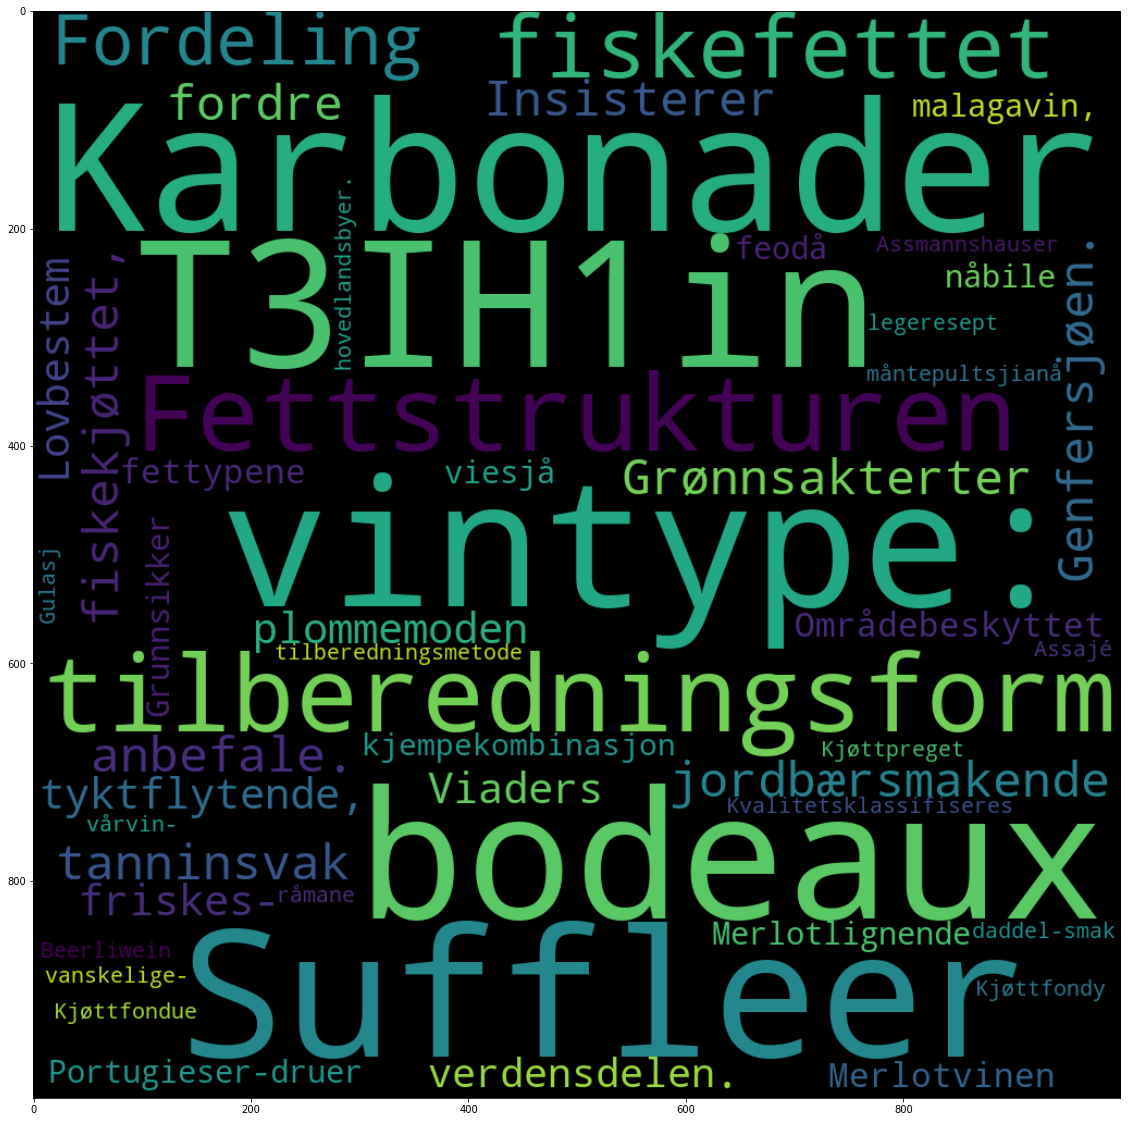

In [23]:
nb.cloud(coll_assoc_korp.head(50)/coll_assoc_korp.sum())